## Dataset  

At a high level, the Numerai dataset is a tabular dataset that describes the stock market over time. It is compiled from high-quality (and expensive) data that might be difficult for individuals to obtain.

The unique thing about Numerai's dataset is that it is `obfuscated`, which means that the underlying stock ids, feature names, and target definitions are anonymized. This makes it so that Numerai can give this data out for free and so that it can be modeled without any financial domain knowledge (or bias!).

### Listing the datasets
Firstly, take a look at the files Numerai offers below:

In [2]:
# Initialize NumerAPI - the official Python API client for Numerai
from numerapi import NumerAPI
napi = NumerAPI()

# list the datasets and available versions
all_datasets = napi.list_datasets()
dataset_versions = list(set(d.split('/')[0] for d in all_datasets))
print("Available versions:\n", dataset_versions)

# Set data version to one of the latest datasets
DATA_VERSION = "v5.1"

# Print all files available for download for our version
current_version_files = [f for f in all_datasets if f.startswith(DATA_VERSION)]
print("Available", DATA_VERSION, "files:\n", current_version_files)

Available versions:
 ['v5.0', 'v5.1']
Available v5.1 files:
 ['v5.1/features.json', 'v5.1/live.parquet', 'v5.1/live_benchmark_models.parquet', 'v5.1/live_example_preds.csv', 'v5.1/live_example_preds.parquet', 'v5.1/meta_model.parquet', 'v5.1/train.parquet', 'v5.1/train_benchmark_models.parquet', 'v5.1/validation.parquet', 'v5.1/validation_benchmark_models.parquet', 'v5.1/validation_example_preds.csv', 'v5.1/validation_example_preds.parquet']


### Downloading datasets

The `features.json` file contains metadata about features in the dataset including:
- statistics on each feature
- helpful sets of features
- the targets available for training

Let's download it and take a look:

In [3]:
import json

# download the feature metadata file
napi.download_dataset(f"{DATA_VERSION}/features.json")

# read the metadata and display
feature_metadata = json.load(open(f"{DATA_VERSION}/features.json"))
for metadata in feature_metadata:
  print(metadata, len(feature_metadata[metadata]))

2025-12-12 17:24:31,336 INFO numerapi.utils: target file already exists
2025-12-12 17:24:31,336 INFO numerapi.utils: download complete


feature_sets 18
targets 37


### Feature Sets & Groups
As you can see there are many features and targets to choose from.

Instead of training a model on all 2000+ features, let's pick a subset of features to analyze.

Here are a few starter sets Numerai offers:

- `small` contains a minimal subset of features that have the highest [feature importance](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)

- `medium` contains all the "basic" features, each unique in some way (e.g. P/E ratios vs analyst ratings)

- `all` contains all features in `medium` and their variants (e.g. P/E by country vs P/E by sector)

In [4]:
feature_sets = feature_metadata["feature_sets"]
for feature_set in ["small", "medium", "all"]:
  print(feature_set, len(feature_sets[feature_set]))

small 42
medium 740
all 2562


In data introduction section, we pick the smallest dataset for memory usage reduction and computation performance improvement.

Let's load the training data for just the small feature set:

In [5]:
import pandas as pd

# Define our feature set
feature_set = feature_sets["small"]

# Download the training data - this will take a few minutes
napi.download_dataset(f"{DATA_VERSION}/train.parquet")

# Load only the "medium" feature set to
# Use the "all" feature set to use all features
train = pd.read_parquet(
    f"{DATA_VERSION}/train.parquet",
    columns=["era", "target"] + feature_set
)

2025-12-12 17:26:23,003 INFO numerapi.utils: target file already exists
2025-12-12 17:26:23,004 INFO numerapi.utils: download complete



### Training data

Each row represents a stock at a specific point in time:
- `id` is the stock id
- `era` is the date
- `target` is a measure of future returns for that stock
- `features` describe the attributes of the stock (eg. P/E ratio) for that date

In [6]:
train

,era,target,feature_antistrophic_striate_conscriptionist,feature_bicameral_showery_wallaba,feature_bridal_fingered_pensioner,feature_collectivist_flaxen_gueux,feature_concurring_fabled_adapter,feature_crosscut_whilom_ataxy,feature_departmental_inimitable_sentencer,feature_dialectal_homely_cambodia,...,feature_tridactyl_immoral_snorting,feature_trimeter_soggy_greatest,feature_unanalyzable_excusable_whirlwind,feature_unbreakable_constraining_hegelianism,feature_unformed_bent_smatch,feature_unministerial_unextenuated_teleostean,feature_unmodish_zymogenic_rousing,feature_unsystematized_subcardinal_malaysia,feature_willful_sere_chronobiology,feature_zoological_peristomial_scute
id,,,,,,,,,,,,,,,,,,,,,
n0007b5abb0c3a25,0001,0.25,2,2,2,2,2,0,1,2,...,4,1,1,3,0,2,2,3,3,2
n003bba8a98662e4,0001,0.25,2,2,2,2,2,1,4,2,...,4,2,0,0,0,2,2,4,4,2
n003bee128c2fcfc,0001,0.75,2,2,2,2,2,2,2,2,...,3,1,1,0,1,2,2,0,3,2
n0048ac83aff7194,0001,0.25,2,2,2,2,2,1,4,2,...,1,3,4,1,2,2,2,2,0,2
n0055a2401ba6480,0001,0.25,2,2,2,2,2,0,0,2,...,1,0,1,0,0,2,2,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nffcc1dbdf2212e6,0574,0.75,1,3,0,0,0,4,3,1,...,2,3,4,2,4,3,2,3,3,3
nffde3b371d67394,0574,0.25,2,3,4,4,2,2,4,2,...,2,4,4,3,4,2,1,4,4,2
nfff1a1111b35e84,0574,0.50,0,0,2,1,4,0,0,4,...,4,0,0,0,0,4,4,0,0,2


### Eras
As mentioned above, each `era` corresponds to a different date. Each era is exactly 1 week apart.

It is helpful to think about rows of stocks within the same `era` as a single example. You will notice that throughout this notebook and other examples, we often talk about things "per era". For example, the number of rows per era represents the number of stocks in Numerai's investable universe on that date.

<Axes: title={'center': 'Number of rows per era'}, xlabel='Era'>

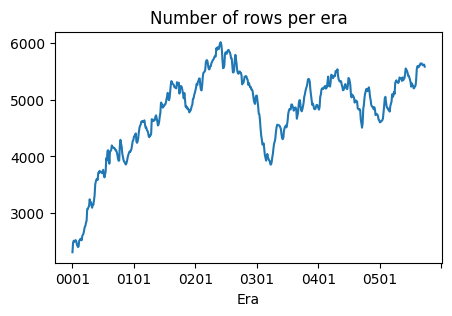

In [7]:
# Plot the number of rows per era
train.groupby("era").size().plot(
    title="Number of rows per era",
    figsize=(5, 3),
    xlabel="Era"
)

### Target
The `target` is a measure of stock market returns over the next 20 (business) days. Specifically, it is a measure of "stock-specific" returns that are not explained by well-known "factors" or broader trends in the market, country, or sector. For example, if Apple went up and the tech sector also went up, we only want to know if Apple went up more or less than the tech sector.

We focus on `alpha`, not on `beta`

Target values are binned into 5 unequal bins: `0`, `0.25`, `0.5`, `0.75`, `1.0`. Again, this heavy regularization of target values is to avoid overfitting as the underlying values are extremely noisy.

<Axes: title={'center': 'Target'}, xlabel='Value', ylabel='Frequency'>

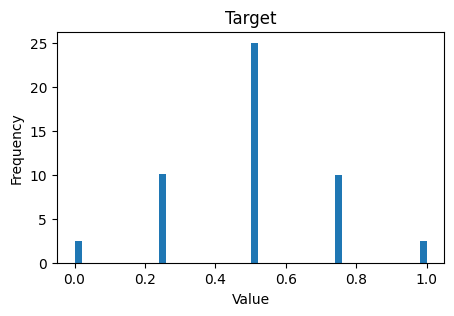

In [8]:
# Plot density histogram of the target
train["target"].plot(
  kind="hist",
  title="Target",
  figsize=(5, 3),
  xlabel="Value",
  density=True,
  bins=50
)

### Features
The `features` are quantitative attributes of each stock: fundamentals like P/E ratio, technical signals like RSI, market data like short interest, secondary data like analyst ratings, and much more.

The underlying definition of each feature is not important, just know that Numerai has included these features in the dataset because they believe they are predictive of the `target` either by themselves or in combination with other features.

Feature values are binned into 5 equal bins: `0`, `1`, `2`, `3`, `4`. This heavy regularization of feature values is to avoid overfitting as the underlying values are extremely noisy. Unlike the target, these are integers instead of floats to reduce the storage needs of the overall dataset.

If data for a particular feature is missing for that era (more common in early `eras`), then all values will be set to `2`.

<Axes: title={'center': 'missing data'}, ylabel='Frequency'>

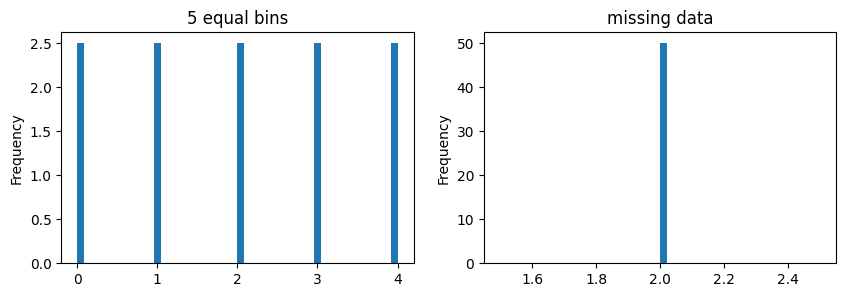

In [9]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
first_era = train[train["era"] == train["era"].unique()[0]]
last_era = train[train["era"] == train["era"].unique()[-1]]
last_era[feature_set[-1]].plot(
   title="5 equal bins",
   kind="hist",
   density=True,
   bins=50,
   ax=ax1
)
first_era[feature_set[-1]].plot(
   title="missing data",
   kind="hist",
   density=True,
   bins=50,
   ax=ax2
)